In [67]:
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
import tensorflow as tf

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [68]:
df = pd.read_csv("Analysis_of_Heartdisease.csv")
df.head()

,index,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = df
data.HeartDisease = le.fit_transform(data.HeartDisease)
data.head()

,index,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [70]:
scaler = StandardScaler()

# define the columns to be encoded and scaled
categorical_vars = ['Sex','Exercise_angina','Numberofvesselsfluro','Chest_pain_type','FBS_over_120','EKG_results','Slope_of_ST','Thallium']
continuous_vars = ["Age","BP","Cholesterol","Max_HR","ST_depression"]


In [71]:
# encoding the categorical columns
data = pd.get_dummies(data, columns = categorical_vars, drop_first = True)
X = data.drop(['HeartDisease'],axis=1)
y = data[['HeartDisease']]
data[continuous_vars] = scaler.fit_transform(X[continuous_vars])
data.head()

,index,Age,BP,Cholesterol,Max_HR,ST_depression,HeartDisease,Sex_1,Exercise_angina_1,Numberofvesselsfluro_1,...,Chest_pain_type_2,Chest_pain_type_3,Chest_pain_type_4,FBS_over_120_1,EKG_results_1,EKG_results_2,Slope_of_ST_2,Slope_of_ST_3,Thallium_6,Thallium_7
0,0,1.712094,-0.075410,1.402212,-1.759208,1.181012,1,1,0,0,...,0,0,1,0,0,1,1,0,0,0
1,1,1.382140,-0.916759,6.093004,0.446409,0.481153,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
2,2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,1,1,...,0,0,1,0,0,0,1,0,0,1
4,4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0


In [28]:
data.shape

(270, 22)

In [72]:
# defining the features and target
X = data.drop(['HeartDisease'],axis=1)
y = data[['HeartDisease']]


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)


In [66]:
model = keras.Sequential([
   
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 1ms/step - loss: 8.6453 - accuracy: 0.4455
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 4.9954 - accuracy: 0.4455
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 2.1793 - accuracy: 0.4455
Epoch 4/300
7/7 [==============================] - 0s 0s/step - loss: 0.8319 - accuracy: 0.4752
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5446
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5545
Epoch 7/300
7/7 [==============================] - 0s 0s/step - loss: 0.6915 - accuracy: 0.5545
Epoch 8/300
7/7 [==============================] - 0s 745us/step - loss: 0.6914 - accuracy: 0.5545
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5594
Epoch 10/300
7/7 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5594
Epoch 11/300
7/7 [============

7/7 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5842
Epoch 168/300
7/7 [==============================] - 0s 0s/step - loss: 0.6660 - accuracy: 0.5792
Epoch 169/300
7/7 [==============================] - 0s 395us/step - loss: 0.6646 - accuracy: 0.5842
Epoch 170/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5842
Epoch 171/300
7/7 [==============================] - 0s 0s/step - loss: 0.6646 - accuracy: 0.5842
Epoch 172/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5842
Epoch 173/300
7/7 [==============================] - 0s 0s/step - loss: 0.6646 - accuracy: 0.5842
Epoch 174/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5842
Epoch 175/300
7/7 [==============================] - 0s 0s/step - loss: 0.6644 - accuracy: 0.5842
Epoch 176/300
7/7 [==============================] - 0s 140us/step - loss: 0.6644 - accuracy: 0.5842
Epoch 177/300
7/7 [=====

Epoch 250/300
7/7 [==============================] - 0s 0s/step - loss: 0.6637 - accuracy: 0.5842
Epoch 251/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.5842
Epoch 252/300
7/7 [==============================] - 0s 0s/step - loss: 0.6634 - accuracy: 0.5842
Epoch 253/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5842
Epoch 254/300
7/7 [==============================] - 0s 0s/step - loss: 0.6631 - accuracy: 0.5842
Epoch 255/300
7/7 [==============================] - 0s 0s/step - loss: 0.6631 - accuracy: 0.5842
Epoch 256/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.5842
Epoch 257/300
7/7 [==============================] - 0s 0s/step - loss: 0.6630 - accuracy: 0.5842
Epoch 258/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.5842
Epoch 259/300
7/7 [==============================] - 0s 0s/step - loss: 0.6629 - accuracy: 0.5842
Epoch 260/300
7/

In [74]:
model.evaluate(X_test, y_test)
yp = model.predict(X_test)


3/3 [==============================] - 0s 0s/step


In [75]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.94      0.66        33
           1       0.71      0.14      0.24        35

    accuracy                           0.53        68
   macro avg       0.61      0.54      0.45        68
weighted avg       0.61      0.53      0.44        68



Text(69.0, 0.5, 'Truth')

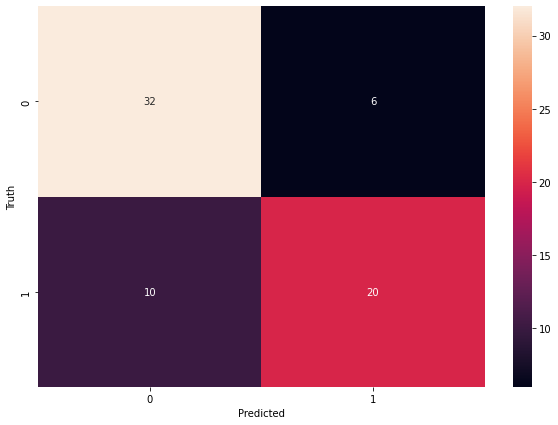

In [58]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')